# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
#### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import matplotlib

mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matricies 

In [2]:
display(X.shape)
display(y.shape)

(70000, 784)

(70000,)

#### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
n = 36000
display(X[n])

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

#### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

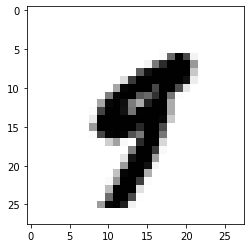

In [4]:
X_reshape = X.reshape((70000,28,28))

plt.imshow(X_reshape[n], cmap = matplotlib.cm.binary, interpolation = 'nearest')

#### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [5]:
display(y[n])

'9'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [6]:
n = 60000

X_train, y_train, X_test, y_test = X[:n], y[:n], X[n:], y[n:]

print(f"{X_train.shape} \t {y_train.shape} \t {X_test.shape} \t {y_test.shape}")

(60000, 784) 	 (60000,) 	 (10000, 784) 	 (10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [7]:
def filter_array(a):
    if a == '5': return True
    else: return False
    
# using broadcasting from numpy to avoid loops
vect_filter = np.vectorize(filter_array)
tr_bool = vect_filter(y_train).tolist()
te_bool = vect_filter(y_test).tolist()

# boolean list -> indexing filter
X_train_5, y_train_5, X_test_5, y_test_5 = X_train[tr_bool], y_train[tr_bool], X_test[te_bool], y_test[te_bool]
print(f"{X_train_5.shape} \t {y_train_5.shape} \t {X_test_5.shape} \t {y_test_5.shape}")

# this returns train and test arrays for ONLY fives
# BUT for classification we need True/False class col -> this y_tr, y_te is not useful

(5421, 784) 	 (5421,) 	 (892, 784) 	 (892,)


In [8]:
display(y_train_5) # comprobación, me ha cogido los sólo cincos

array(['5', '5', '5', ..., '5', '5', '5'], dtype=object)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [9]:
from sklearn.linear_model import LogisticRegression

y_tr_5 = vect_filter(y_train)

# Estimator using the default optimizer.
model = LogisticRegression(random_state = 0).fit(X_train, y_tr_5)
model.score(X_train, y_tr_5)

/home/lucia/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9778166666666667

### Does the classifier predict correctly the 36000th digit we picked before?

In [10]:
n = 36000

y_pred = model.predict(X_train)

y_pred[n] == y_tr_5[n] # It does predict de 36000th digit well

True

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [11]:
from sklearn.base import BaseEstimator

class Never5_Classifier(BaseEstimator):
    """ Hereda el init de Base Estimator"""
    
    def __init__(self, numb_to_never_predict = 5):
        """Añado en el init el numero para el que no atinará nada"""
        self.numb = numb_to_never_predict
        
    def __filter_y(self, y):
        """Implemento la función que me transforma y en booleanos según su igualdad al num"""
        func = lambda x: 1 if (x != str(self.numb)) else 0
        vect_filtr = np.vectorize(func)
        
        y_bool = vect_filtr(y)
        return y_bool
        
    def fit(self, X, y):
        return  LogisticRegression().fit(X, self.__filter_y(y))
        
    def predict(self, X):
        return  LogisticRegression().predict(X)
    

never_5_clf = Never5_Classifier().fit(X_train, y_train)
never_5_clf

/home/lucia/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [12]:
n = 36000

y_pred_never_5 = never_5_clf.predict(X_train)

y_pred_never_5[n] == y_tr_5[n] # It does not predict de 36000th digit well

False

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [14]:
from sklearn.metrics import confusion_matrix

cm_1 = confusion_matrix(y_tr_5, y_pred)
cm_2 = confusion_matrix(y_tr_5, y_pred_never_5)

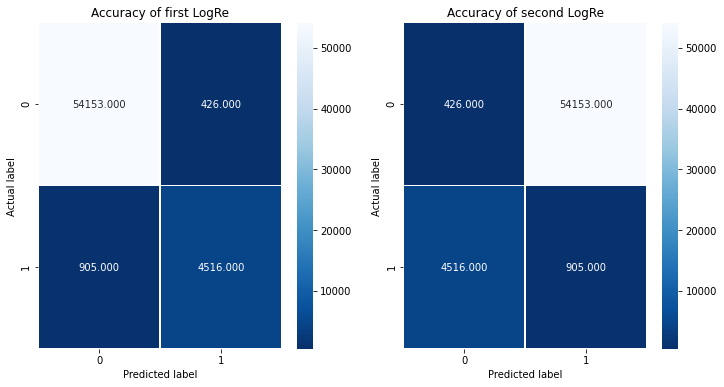

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,(ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (12,6))

g1 = sns.heatmap(cm_1, annot=True, fmt=".3f", linewidths=.5, cmap = 'Blues_r', ax = ax1)
g1.set_ylabel('Actual label')
g1.set_xlabel('Predicted label')
g1.set_title('Accuracy of first LogRe')

g2 = sns.heatmap(cm_2, annot=True, fmt=".3f", linewidths=.5, cmap = 'Blues_r', ax = ax2)
g2.set_ylabel('Actual label')
g2.set_xlabel('Predicted label')
g2.set_title('Accuracy of second LogRe')

plt.show()

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [21]:

#    Since I have been a bit lazy defining the model that alqays misses 5s, 
#    it is only but a mirror of the first model.
    
#    True Positive [1] = 4516 and True Negative [2] = 4516
#    
#    Probably the def. of the second models needs a review


### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [17]:
from sklearn.metrics import roc_curve

fpr_1, tpr_1, thresholds_1 = roc_curve(y_tr_5, y_pred)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_tr_5, y_pred_never_5)

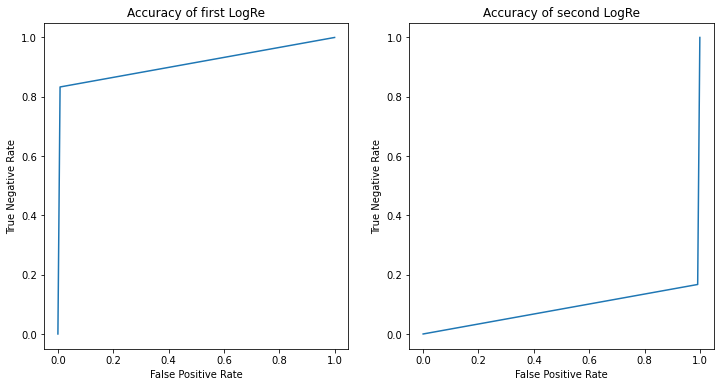

In [18]:
fig,ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12,6))

ax[0].plot(fpr_1, tpr_1, label='Model 1')
ax[0].set_xlabel('False Positive Rate') # PRECISION
ax[0].set_ylabel('True Negative Rate') # RECALL
ax[0].set_title('Accuracy of first LogRe')

ax[1].plot(fpr_2, tpr_2, label='Model 2')
ax[1].set_xlabel('False Positive Rate') # PRECISION
ax[1].set_ylabel('True Negative Rate') # RECALL
ax[1].set_title('Accuracy of second LogRe')

plt.show()

### Now find the roc_auc_score for each. 

In [19]:
from sklearn.metrics import roc_auc_score

auc_1 = roc_auc_score(y_tr_5, y_pred)
auc_2 = roc_auc_score(y_tr_5, y_pred_never_5)

print(f'Model 1: ROC AUC={auc_1}')
print(f'Model 2: ROC AUC={auc_2}')

Model 1: ROC AUC=0.9126257159078305
Model 2: ROC AUC=0.08737428409216949


### What does this metric tell you? Which classifier works better with this metric in mind?

In [20]:
# https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
# https://en.wikipedia.org/wiki/Receiver_operating_characteristic

# roc_auc is the area under the ROC curve plotted before
# the greater the area, the better the model to predict reality:
# 0s as 0s and 1s as 1s. 